# **Analises de Dados (Maio/2021) - parte 1 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. Aprofundaremos as leituras do dataframe da plataforma modelando os dados de forma a normalizá-los, buscando identificar indicadores já conhecidos e buscando novos que façam sentido, introduzindo a Machine Learning como agente facilitador, padronizando e rescalonando para fim de comparação.
Buscarei introduzir na analise o engajamento dos alunos, fazer comparações entre institutos em sua participação normalizando os dados da seguinte forma:

Quando dividimos a somatoria do uso de uma ferramenta didática pelo número de matrículados, analisando por ano e por unidade obtemos uma média de uso, normalizando o uso pela quantidade de alunos, e visualizando as unidades que mais usam cada ferramenta.

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Este Dataframe  apresenta a contagem da quantidade de docentes, disciplinas e turmas, separadas por unidade e por ano oriunda do sistema de matrículas (Jupiterweb) da Universidade de São Paulo. 

In [36]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/docdistur.csv"
base = pd.read_csv(url1)
base['sglund'] = base['sglund'].astype('object')
base['ano'] = base['ano'].astype('int64')
base.rename(columns={'sglund':'unidade'}, inplace = True)
base = base[base["ano"] > 2011]
base.sample(2)

,unidade,ano,docentes,disciplinas,turmas
1017,IP,2012,88,111,230
850,IEB,2014,11,16,25


Este dataframe a seguir condiz com os dados do E-disciplina USP completo:

In [37]:
url2 = "https://raw.githubusercontent.com/gustavo-ifusp/edisc-analytics/main/data/raw/mc-24-11-2020.csv"
dados = pd.read_csv(url2)
dados.iloc[-2:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
38292,83959,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,teste_marcos,teste_marcos,NaN,FFLCH,FFLCH,2020,2,0,0,0,0,1,0,0,0,humanas,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38293,83965,https://edisciplinas.usp.br/course/view.php?id...,3,1,1,1,1,1,0,1,1,4,1,0.0,7,1,0.0,0,0,2,0,8,0.0,1,0.0,0,6,0,0,2.517794,18,42,15,4,7,1,12,2,STI FMRP 2020,STI FMRP 2020,NaN,STI,FMRP,2020,2,0,1,0,0,0,0,0,0,biologicas,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38294 entries, 0 to 38293
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              38294 non-null  int64  
 1   link               38294 non-null  object 
 2   assign             38294 non-null  int64  
 3   attendance         38294 non-null  int64  
 4   bigbluebuttonbn    38294 non-null  int64  
 5   book               38294 non-null  int64  
 6   chat               38294 non-null  int64  
 7   choice             38294 non-null  int64  
 8   data               38294 non-null  int64  
 9   dialogue           38294 non-null  int64  
 10  folder             38294 non-null  int64  
 11  forum              38294 non-null  int64  
 12  glossary           38294 non-null  int64  
 13  imscp              38294 non-null  float64
 14  label              38294 non-null  int64  
 15  lesson             38294 non-null  int64  
 16  lti                382

Este terceiro Dataframe a seguir informa por curso a quantidade de matriculados:

In [39]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/matrcurso.csv"
matrcurso = pd.read_csv(url3)
matrcurso['sglund'] = matrcurso['sglund'].astype('object')
matrcurso.rename(columns={'sglund':'unidade'}, inplace = True)
matrcurso.sample(5)

,ano,sem,codclg,codcur,codhab,staalu,codund,unidade,nomcur,nomhab,matr
2785,2012,1,8,8051,904,T,8,FFLCH,Letras,Bacharelado - Habilitação: Italiano,14
5513,2018,1,8,8040,200,T,8,FFLCH,Ciências Sociais,Licenciatura em Ciências Sociais,57
17533,2016,2,86,86200,102,A,86,EACH,Bacharelado em Sistemas de Informação,Bacharelado em Sistemas de Informação - Ciclo ...,1
15932,2012,1,75,75014,400,M,75,IQSC,Química,Bacharelado em Química - Habilitação: Tecnológ...,45
13303,2015,2,46,46300,500,R,46,IQ,Química,Bacharelado em Química com Ênfase em Biotecnol...,1


A normalização de dados também pode ser uma prática típica em aprendizado de máquina (Machine Learning), que consiste em transformar colunas numéricas em uma escala padrão. No aprendizado de máquina, alguns valores de recursos diferem de outros várias vezes em escalas. Os recursos com valores mais elevados dominarão o processo de aprendizagem. Logo a normalização garante melhor clareza nas visualizações finais.





# **Indicador 1: Mn /n° de matriculados**
O primeiro indicador que vou analisar é a somatoria das colunas (Mn) / nº de matriculados e visualizar as unidades mais representativas por ano e unidade, lembrando que temos 60 entradas em unidade nos três dataframes. Este indicador possui como objetivo analisar uma média de utilização de cada recurso didático do e-disciplina comparada por ano e unidade afim de ver quais recursos são mais utilizados, normalizado pelo número de matriculados de cada unidade.<br>
<br>Cada coluna foi identificada como:

M1 = Nunique;<br>
M2 = N;<br>
M3 = Nresource1;<br>
M4 = Nresource2;<br>
M5 = Ncommunication;<br>
M6 = forum;<br>
M7 = lesson;<br>
M8 = questionaire;<br>
M9 = quiz;<br>
M10 = resource;<br>
M11 = url;<br>
M12 = studentquiz;<br>
M13 = game;<br>
NM = Número de matriculados

In [40]:
M1 = dados.groupby(['ano','unidade'])['Nunique'].sum()
M2 = dados.groupby(['ano','unidade'])['N'].sum()
M3 = dados.groupby(['ano','unidade'])['Nresource1'].sum()
M4 = dados.groupby(['ano','unidade'])['Nresource2'].sum()
M5 = dados.groupby(['ano','unidade'])['Ncommunication'].sum()
M6 = dados.groupby(['ano','unidade'])['forum'].sum()
M7 = dados.groupby(['ano','unidade'])['lesson'].sum()
M8 = dados.groupby(['ano','unidade'])['questionnaire'].sum()
M9 = dados.groupby(['ano','unidade'])['quiz'].sum()
M10 = dados.groupby(['ano','unidade'])['resource'].sum()
M11 = dados.groupby(['ano','unidade'])['url'].sum()
M12 = dados.groupby(['ano','unidade'])['studentquiz'].sum()
M13 = dados.groupby(['ano','unidade'])['game'].sum()
NM = matrcurso.groupby(['ano','unidade'])['matr'].sum()
i1 = pd.concat([M1,M2, M3, M4, M5, M6, M7, M8, M9, M10, M11, M12, M13, NM],axis = 1)
i1 = i1.fillna(0)
#
#caso queira deixar de ser categorico
i1.reset_index(level=0, inplace=True)
i1.reset_index(level=0, inplace=True)
i1 = i1.query("matr != '0'")

In [41]:
i1['indicador1'] = (i1['Nunique']/i1['matr'])
i1['indicador2'] = (i1['N']/i1['matr'])
i1['indicador3'] = (i1['Nresource1']/i1['matr'])
i1['indicador4'] = (i1['Nresource2']/i1['matr'])
i1['indicador5'] = (i1['Ncommunication']/i1['matr'])
i1['indicador6'] = (i1['forum']/i1['matr'])
i1['indicador7'] = (i1['lesson']/i1['matr'])
i1['indicador8'] = (i1['questionnaire']/i1['matr'])
i1['indicador9'] = (i1['quiz']/i1['matr'])
i1['indicador10'] = (i1['resource']/i1['matr'])
i1['indicador11'] = (i1['url']/i1['matr'])
i1['indicador12'] = (i1['studentquiz']/i1['matr'])
i1['indicador13'] = (i1['game']/i1['matr'])
i1.head(5)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
0,CENA,2012,4.0,25.0,22.0,0.0,2.0,2.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,9.0,0.444444,2.777778,2.444444,0.000000,0.222222,0.222222,0.000000,0.000000,0.000000,2.444444,0.000000,0.0,0.0
1,EACH,2012,43.0,497.0,392.0,0.0,43.0,42.0,0.0,0.0,23.0,356.0,24.0,0.0,0.0,9467.0,0.004542,0.052498,0.041407,0.000000,0.004542,0.004436,0.000000,0.000000,0.002429,0.037604,0.002535,0.0,0.0
2,ECA,2012,112.0,861.0,605.0,109.0,52.0,51.0,1.0,1.0,9.0,367.0,124.0,0.0,0.0,4308.0,0.025998,0.199861,0.140436,0.025302,0.012071,0.011838,0.000232,0.000232,0.002089,0.085190,0.028784,0.0,0.0
4,EE,2012,18.0,224.0,214.0,0.0,10.0,10.0,0.0,0.0,0.0,203.0,9.0,0.0,0.0,849.0,0.021201,0.263840,0.252061,0.000000,0.011779,0.011779,0.000000,0.000000,0.000000,0.239105,0.010601,0.0,0.0
5,EEFE,2012,17.0,150.0,138.0,2.0,8.0,8.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,1070.0,0.015888,0.140187,0.128972,0.001869,0.007477,0.007477,0.000000,0.000000,0.000000,0.102804,0.000000,0.0,0.0


In [42]:
i1.describe().loc[['mean','std']]

,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
mean,2015.995536,291.553571,2819.680804,2198.020089,58.361607,163.183036,146.390625,4.337054,21.959821,86.544643,1687.214286,269.058036,0.100446,0.020089,2226.984375,0.671539,6.787971,5.747919,0.143524,0.346068,0.329553,0.004951,0.019049,0.142797,4.390228,0.912339,0.000114,0.000013
std,2.568956,537.427322,5583.711686,4334.469454,120.509335,319.670898,264.233121,16.427599,74.907120,237.000142,3256.807583,718.553441,0.846733,0.380801,3077.625451,3.944901,47.015973,41.967015,0.999960,2.119902,2.103658,0.049831,0.099848,1.147678,30.089896,9.508714,0.001373,0.000263


#**Indicador 1: Nunique / Nº de matriculas**

In [43]:
i1_1 = i1.loc[(i1['indicador1']) > 2] #esse filtro seleciona apenas as unidades que possuirem uma media >2
i1_1.head(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
46,MAC,2012,15.0,193.0,139.0,13.0,5.0,5.0,0.0,0.0,0.0,122.0,5.0,0.0,0.0,3.0,5.000000,64.333333,46.333333,4.333333,1.666667,1.666667,0.0,0.0,0.0,40.666667,1.666667,0.0,0.0
155,MAC,2014,25.0,222.0,200.0,0.0,12.0,12.0,0.0,0.0,0.0,187.0,2.0,0.0,0.0,3.0,8.333333,74.000000,66.666667,0.000000,4.000000,4.000000,0.0,0.0,0.0,62.333333,0.666667,0.0,0.0


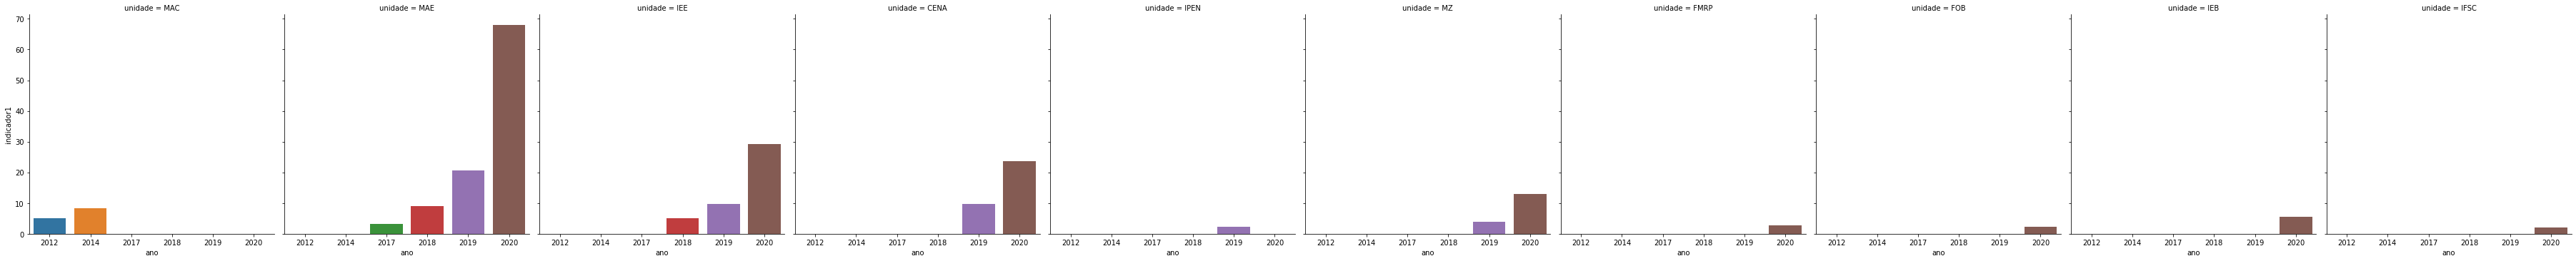

In [44]:
sns.catplot(x="ano", y="indicador1", col="unidade",
                data=i1_1, 
                kind="bar"
                )

#**Indicador 2: N / Nº de matriculas**

In [45]:
i1_2 = i1.loc[(i1['indicador2']) > 25] 
i1_2.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
324,MAE,2017,25.0,289.0,278.0,0.0,10.0,10.0,0.0,0.0,0.0,235.0,36.0,0.0,0.0,8.0,3.125000,36.125000,34.75,0.0,1.250000,1.250000,0.0,0.0,0.0,29.375000,4.500000,0.0,0.0
428,MAE,2019,62.0,692.0,648.0,0.0,32.0,32.0,0.0,0.0,0.0,548.0,71.0,0.0,0.0,3.0,20.666667,230.666667,216.00,0.0,10.666667,10.666667,0.0,0.0,0.0,182.666667,23.666667,0.0,0.0


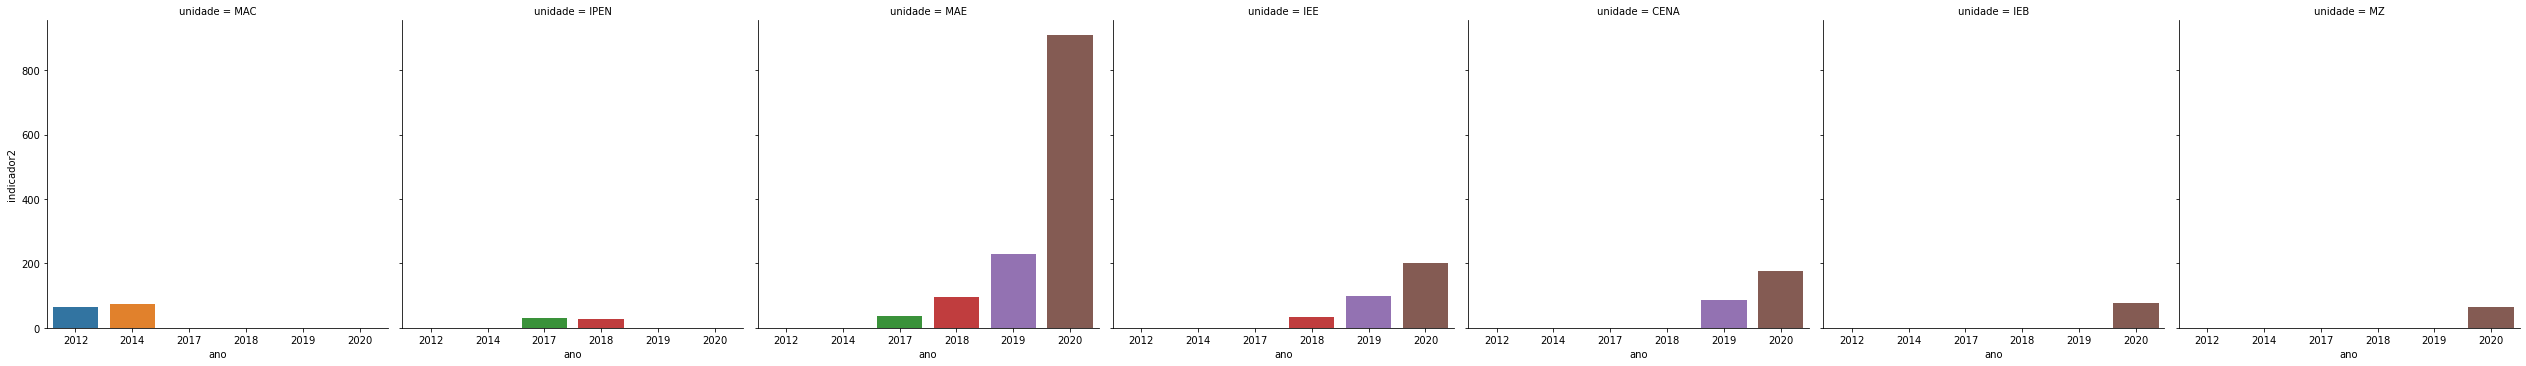

In [46]:
sns.catplot(x="ano", y="indicador2", col="unidade",
                data=i1_2, 
                kind="bar"
                )

#**Indicador 3: Nresource1 / Nº de matriculas**

In [47]:
i1_3 = i1.loc[(i1['indicador3']) > 50] 
i1_3.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
415,IEE,2019,29.0,292.0,257.0,1.0,12.0,12.0,0.0,0.0,0.0,213.0,15.0,0.0,0.0,3.0,9.666667,97.333333,85.666667,0.333333,4.000000,4.000000,0.0,0.000000,0.0,71.000000,5.000000,0.0,0.0
379,CENA,2019,29.0,259.0,208.0,18.0,8.0,8.0,0.0,4.0,6.0,170.0,38.0,0.0,0.0,3.0,9.666667,86.333333,69.333333,6.000000,2.666667,2.666667,0.0,1.333333,2.0,56.666667,12.666667,0.0,0.0


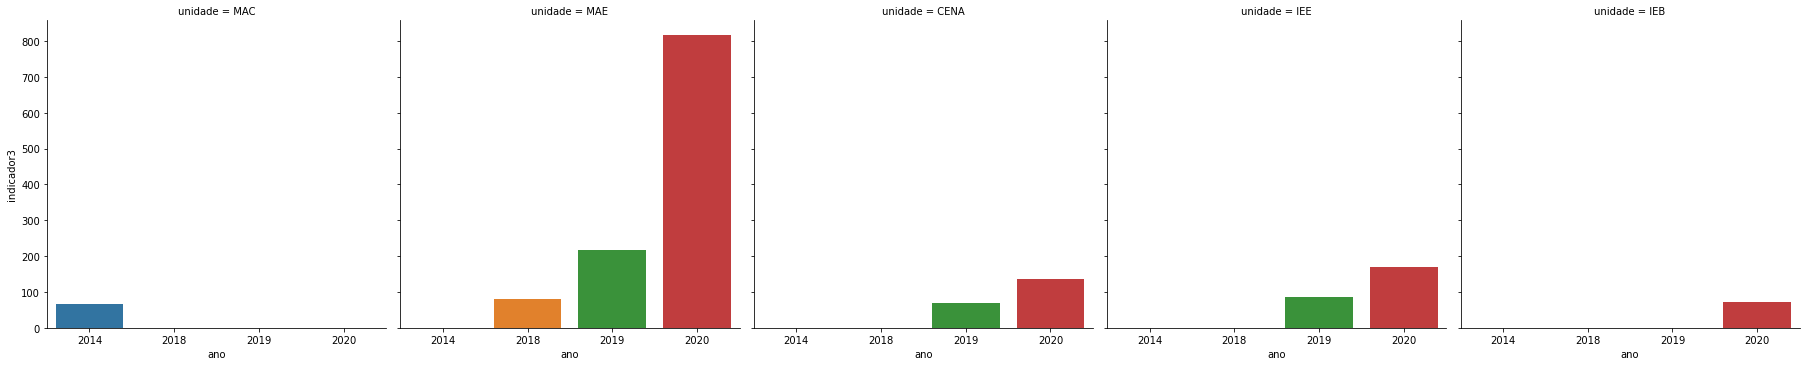

In [48]:
sns.catplot(x="ano", y="indicador3", col="unidade",
                data=i1_3, 
                kind="bar"
                )

#**Indicador 4: Nresource2 / Nº de matriculas**

In [49]:
i1_4 = i1.loc[(i1['indicador4']) > 1] 
i1_4.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
46,MAC,2012,15.0,193.0,139.0,13.0,5.0,5.0,0.0,0.0,0.0,122.0,5.0,0.0,0.0,3.0,5.000000,64.333333,46.333333,4.333333,1.666667,1.666667,0.0,0.000000,0.000000,40.666667,1.666667,0.00000,0.0
458,FOB,2020,1169.0,9088.0,6108.0,720.0,647.0,605.0,0.0,540.0,530.0,2854.0,2295.0,15.0,0.0,534.0,2.189139,17.018727,11.438202,1.348315,1.211610,1.132959,0.0,1.011236,0.992509,5.344569,4.297753,0.02809,0.0


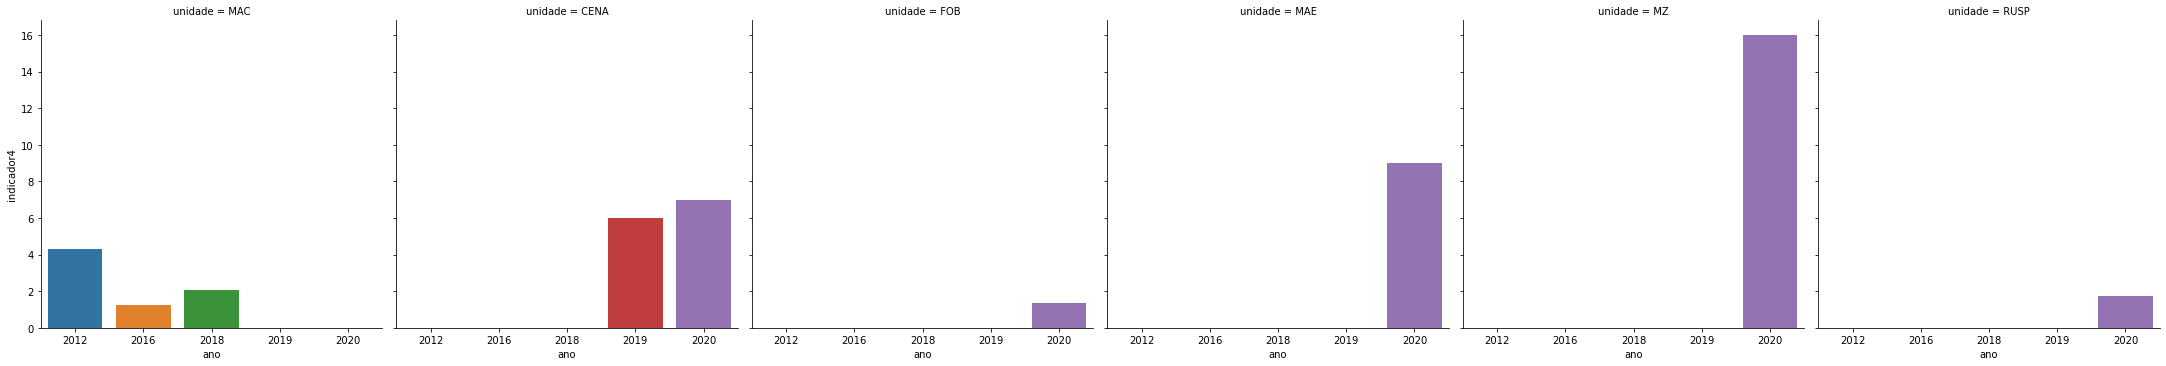

In [50]:
sns.catplot(x="ano", y="indicador4", col="unidade",
                data=i1_4, 
                kind="bar"
                )

#**Indicador 5: Ncommunication / Nº de matriculas**

In [51]:
i1_5 = i1.loc[(i1['indicador5']) > 3] 
i1_5.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
471,IFSC,2020,925.0,8457.0,5590.0,229.0,1545.0,327.0,5.0,50.0,345.0,3274.0,1696.0,0.0,0.0,462.0,2.002165,18.305195,12.099567,0.495671,3.344156,0.707792,0.010823,0.108225,0.746753,7.08658,3.670996,0.0,0.0
375,MAE,2018,36.0,381.0,324.0,0.0,18.0,18.0,0.0,0.0,2.0,287.0,27.0,0.0,0.0,4.0,9.000000,95.250000,81.000000,0.000000,4.500000,4.500000,0.000000,0.000000,0.500000,71.75000,6.750000,0.0,0.0


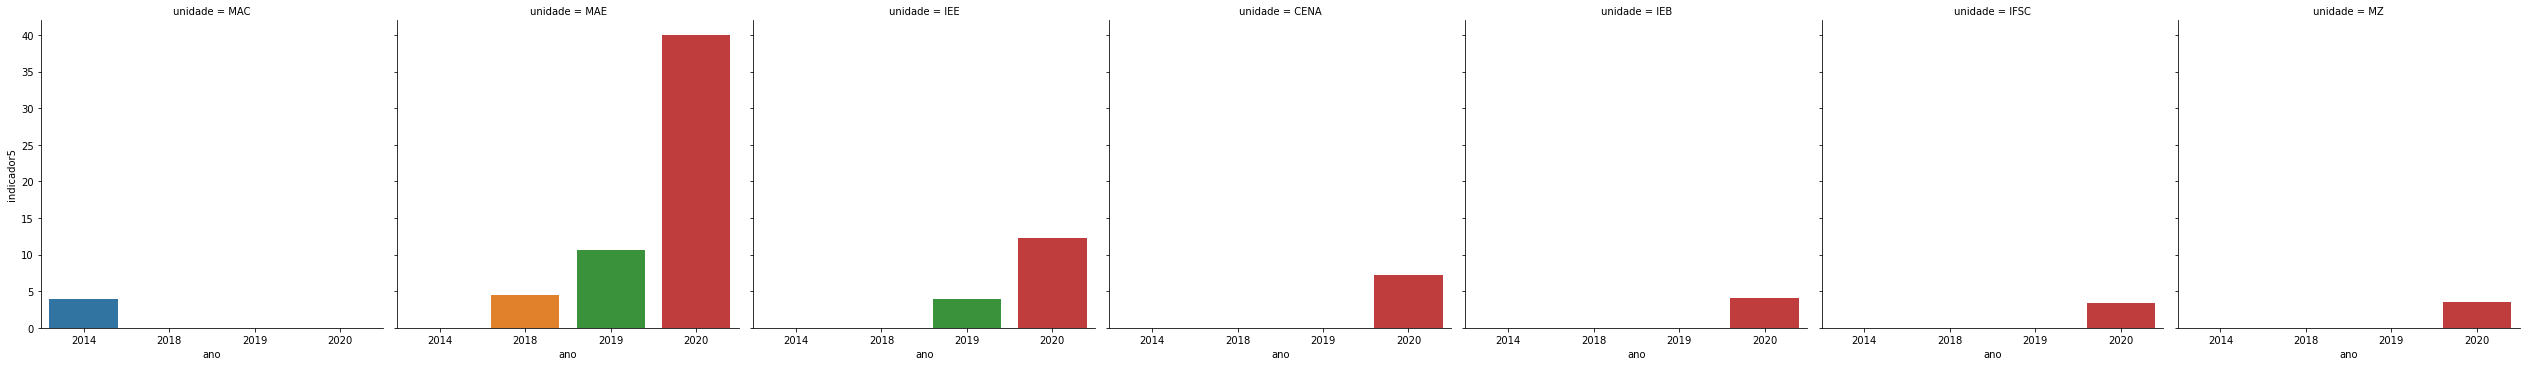

In [52]:
sns.catplot(x="ano", y="indicador5", col="unidade",
                data=i1_5, 
                kind="bar"
                )

#**Indicador 6: forum / Nº de matriculas**

In [53]:
i1_6 = i1.loc[(i1['indicador6']) > 3] 
i1_6.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
484,MZ,2020,26.0,127.0,75.0,32.0,7.0,7.0,2.0,2.0,3.0,72.0,1.0,0.0,0.0,2.0,13.000000,63.500000,37.500000,16.0,3.500000,3.500000,1.0,1.0,1.500000,36.0,0.500000,0.0,0.0
469,IEE,2020,88.0,608.0,512.0,0.0,37.0,35.0,0.0,0.0,4.0,369.0,109.0,0.0,0.0,3.0,29.333333,202.666667,170.666667,0.0,12.333333,11.666667,0.0,0.0,1.333333,123.0,36.333333,0.0,0.0


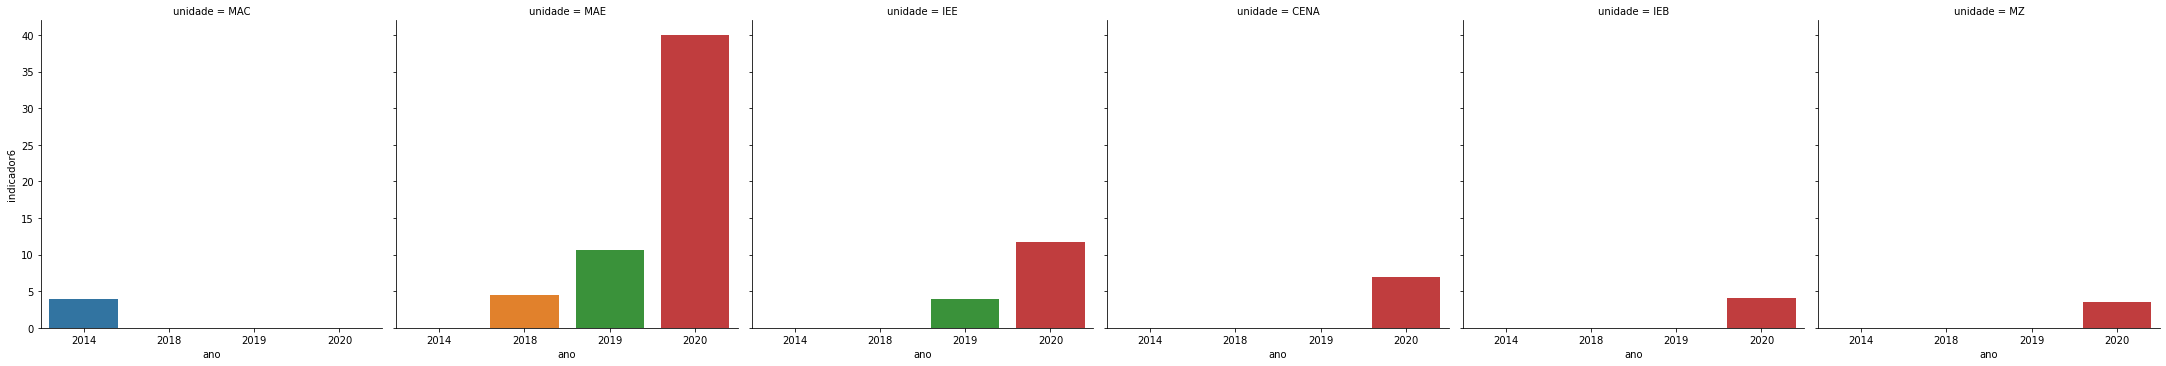

In [54]:
sns.catplot(x="ano", y="indicador6", col="unidade",
                data=i1_6, 
                kind="bar"
                )

#**Indicador 7: lesson / Nº de matriculas**

In [55]:
i1_7 = i1.loc[(i1['indicador7']) > 0.1] #esse indicador possui uma média de uso muito pequena por aluno, possivelmente não faça sentido!
i1_7.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
484,MZ,2020,26.0,127.0,75.0,32.0,7.0,7.0,2.0,2.0,3.0,72.0,1.0,0.0,0.0,2.0,13.000000,63.500000,37.50000,16.000000,3.500000,3.500000,1.000000,1.000000,1.500000,36.000000,0.500000,0.0,0.0
472,IGc,2020,392.0,3846.0,2832.0,138.0,222.0,216.0,92.0,22.0,125.0,2140.0,527.0,0.0,0.0,484.0,0.809917,7.946281,5.85124,0.285124,0.458678,0.446281,0.190083,0.045455,0.258264,4.421488,1.088843,0.0,0.0


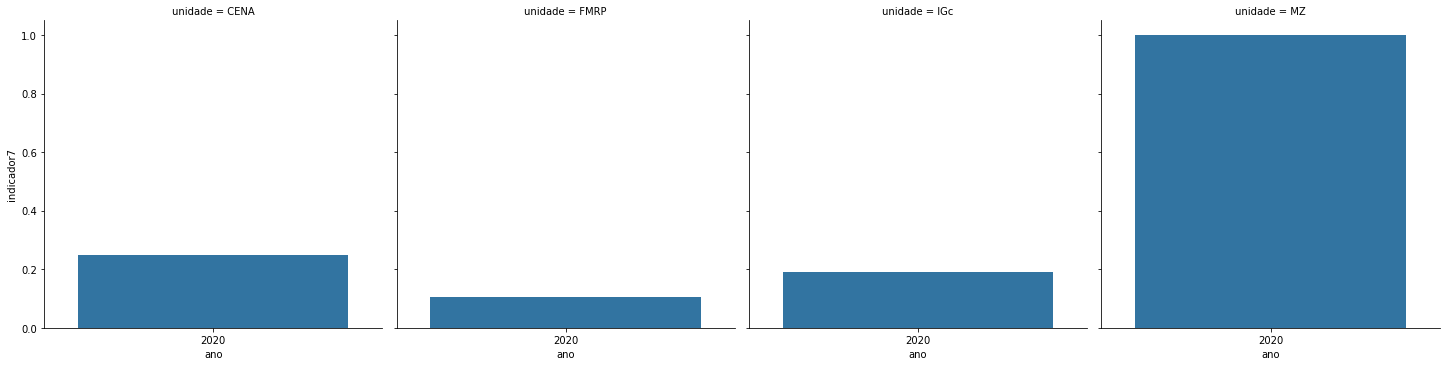

In [56]:
sns.catplot(x="ano", y="indicador7", col="unidade",
                data=i1_7, 
                kind="bar"
                )

#**Indicador 8: questionnaire / Nº de matriculas**

In [57]:
i1_8 = i1.loc[(i1['indicador8']) > 0.1] 
i1_8.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
296,FMRP,2017,1600.0,10151.0,7228.0,155.0,956.0,940.0,39.0,654.0,432.0,5489.0,682.0,0.0,0.0,2862.0,0.559050,3.546820,2.525507,0.054158,0.334032,0.328442,0.013627,0.228512,0.150943,1.917890,0.238295,0.0,0.0
349,FMRP,2018,1754.0,11837.0,8833.0,224.0,1064.0,1043.0,61.0,474.0,446.0,6770.0,874.0,0.0,0.0,2887.0,0.607551,4.100104,3.059577,0.077589,0.368549,0.361275,0.021129,0.164184,0.154486,2.344995,0.302736,0.0,0.0


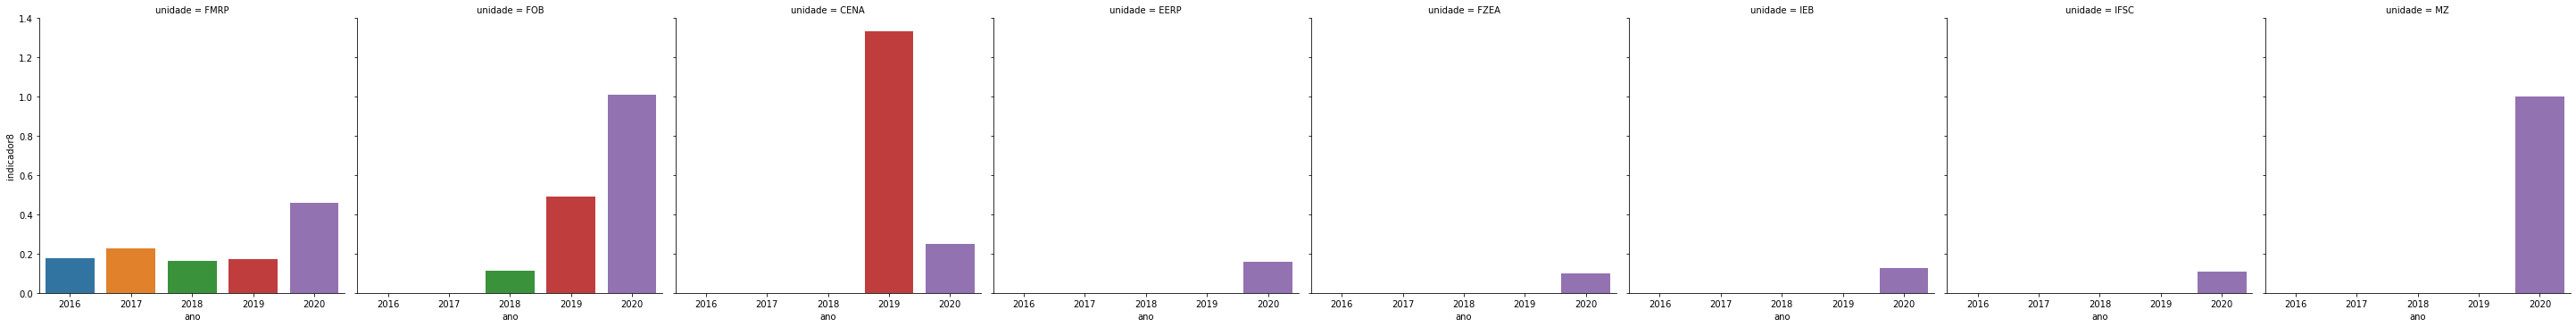

In [58]:
sns.catplot(x="ano", y="indicador8", col="unidade",
                data=i1_8, 
                kind="bar"
                )

#**Indicador 9: quiz / Nº de matriculas**

In [59]:
i1_9 = i1.loc[(i1['indicador9']) > 1] 
i1_9.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
379,CENA,2019,29.0,259.0,208.0,18.0,8.0,8.0,0.0,4.0,6.0,170.0,38.0,0.0,0.0,3.0,9.666667,86.333333,69.333333,6.0,2.666667,2.666667,0.0,1.333333,2.0,56.666667,12.666667,0.0,0.0
482,MAE,2020,68.0,909.0,817.0,9.0,40.0,40.0,0.0,0.0,19.0,574.0,193.0,0.0,0.0,1.0,68.000000,909.000000,817.000000,9.0,40.000000,40.000000,0.0,0.000000,19.0,574.000000,193.000000,0.0,0.0


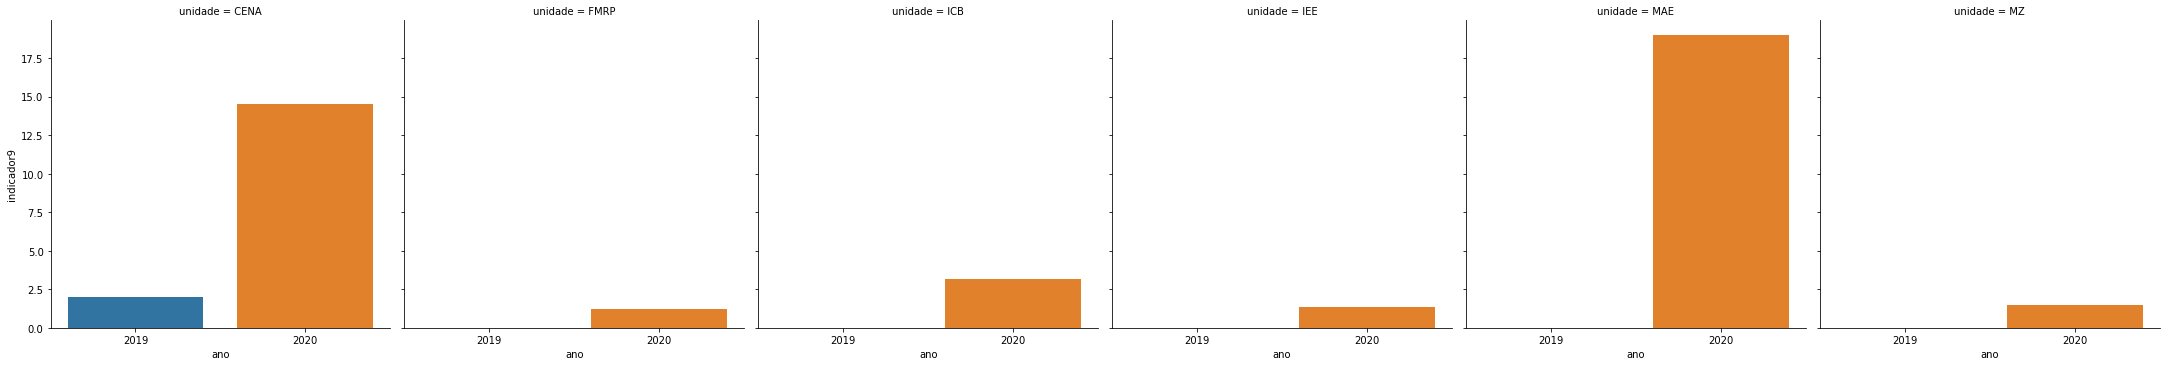

In [60]:
sns.catplot(x="ano", y="indicador9", col="unidade",
                data=i1_9, 
                kind="bar"
                )

#**Indicador 10: resource / Nº de matriculas**

In [61]:
i1_10 = i1.loc[(i1['indicador10']) > 10] 
i1_10.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
324,MAE,2017,25.0,289.0,278.0,0.0,10.0,10.0,0.0,0.0,0.0,235.0,36.0,0.0,0.0,8.0,3.125000,36.125000,34.75,0.0,1.250000,1.250000,0.0,0.0,0.0,29.375000,4.500000,0.0,0.0
423,IPEN,2019,13.0,130.0,123.0,0.0,5.0,5.0,0.0,0.0,0.0,115.0,1.0,0.0,0.0,6.0,2.166667,21.666667,20.50,0.0,0.833333,0.833333,0.0,0.0,0.0,19.166667,0.166667,0.0,0.0


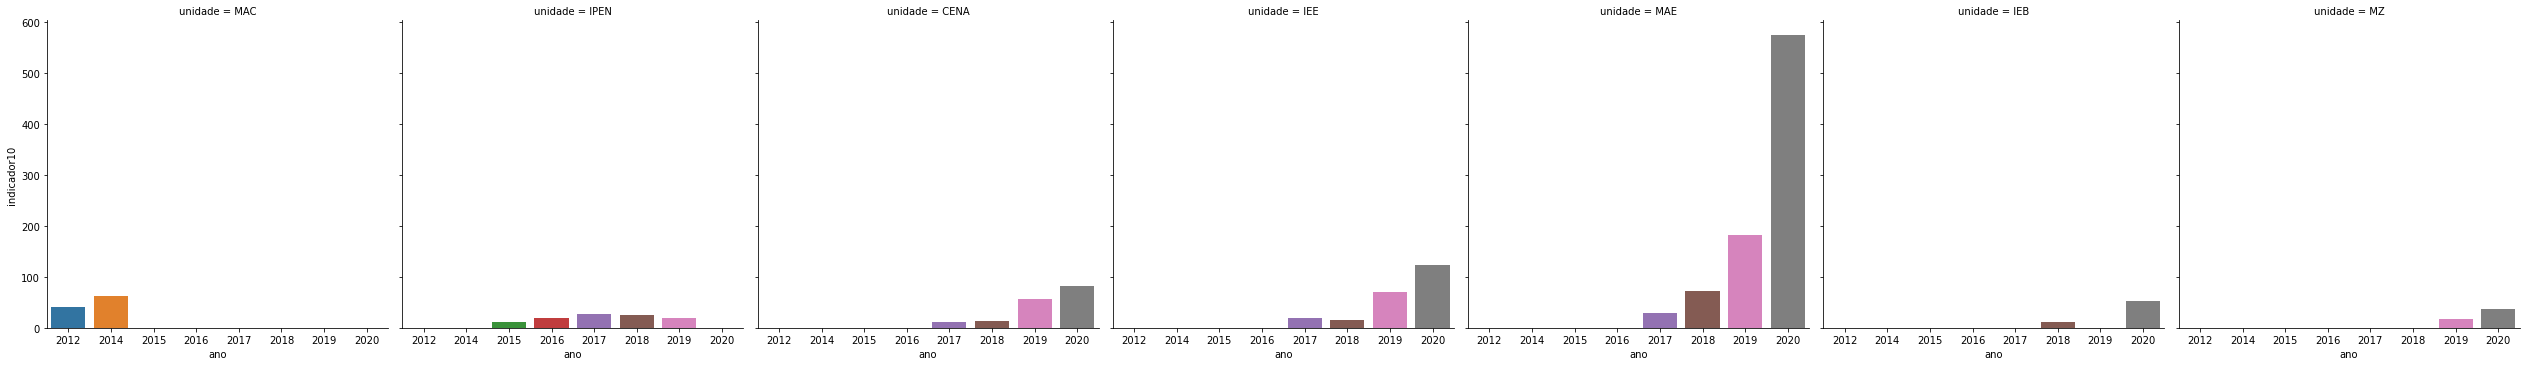

In [62]:
sns.catplot(x="ano", y="indicador10", col="unidade",
                data=i1_10, 
                kind="bar"
                )

#**Indicador 11: url / Nº de matriculas**

In [63]:
i1_11 = i1.loc[(i1['indicador11']) > 4] 
i1_11.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
428,MAE,2019,62.0,692.0,648.0,0.0,32.0,32.0,0.0,0.0,0.0,548.0,71.0,0.0,0.0,3.0,20.666667,230.666667,216.000000,0.000000,10.666667,10.666667,0.0,0.0,0.0,182.666667,23.666667,0.0,0.0
415,IEE,2019,29.0,292.0,257.0,1.0,12.0,12.0,0.0,0.0,0.0,213.0,15.0,0.0,0.0,3.0,9.666667,97.333333,85.666667,0.333333,4.000000,4.000000,0.0,0.0,0.0,71.000000,5.000000,0.0,0.0


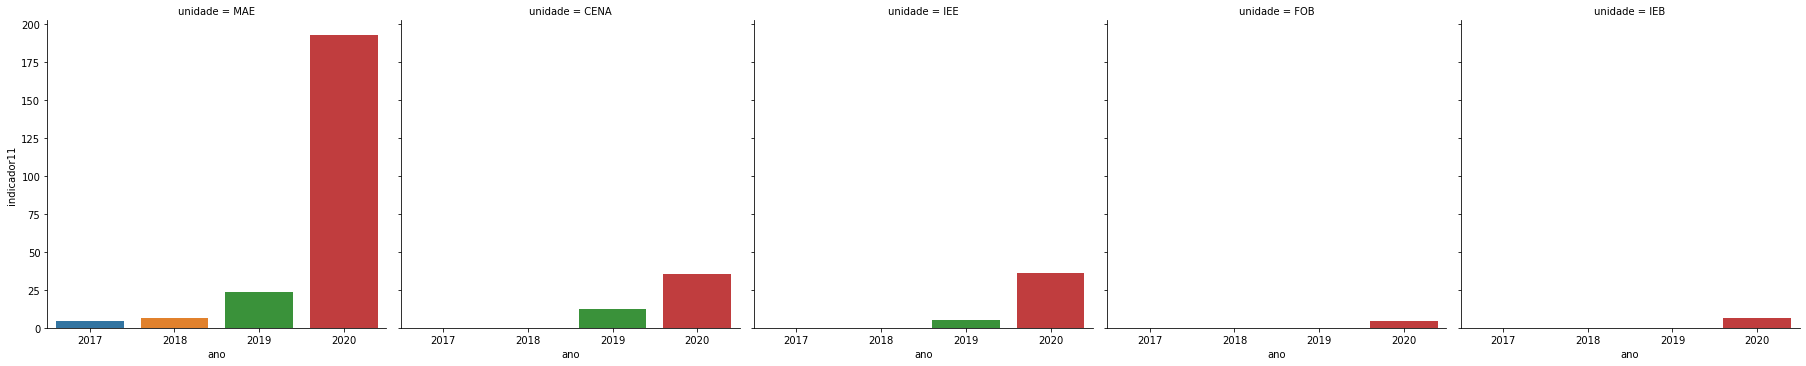

In [64]:
sns.catplot(x="ano", y="indicador11", col="unidade",
                data=i1_11, 
                kind="bar"
                )

#**Indicador 12: studentquiz / Nº de matriculas**

In [65]:
i1_12 = i1.loc[(i1['indicador12']) > 0.001] 
i1_12.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
478,IQ,2020,510.0,5262.0,4143.0,38.0,258.0,232.0,5.0,30.0,331.0,2846.0,1010.0,1.0,0.0,816.0,0.625000,6.448529,5.077206,0.046569,0.316176,0.284314,0.006127,0.036765,0.405637,3.487745,1.237745,0.001225,0.0
470,IF,2020,627.0,6935.0,4956.0,191.0,360.0,300.0,13.0,53.0,680.0,3364.0,700.0,2.0,0.0,1437.0,0.436326,4.826026,3.448852,0.132916,0.250522,0.208768,0.009047,0.036882,0.473208,2.340988,0.487126,0.001392,0.0


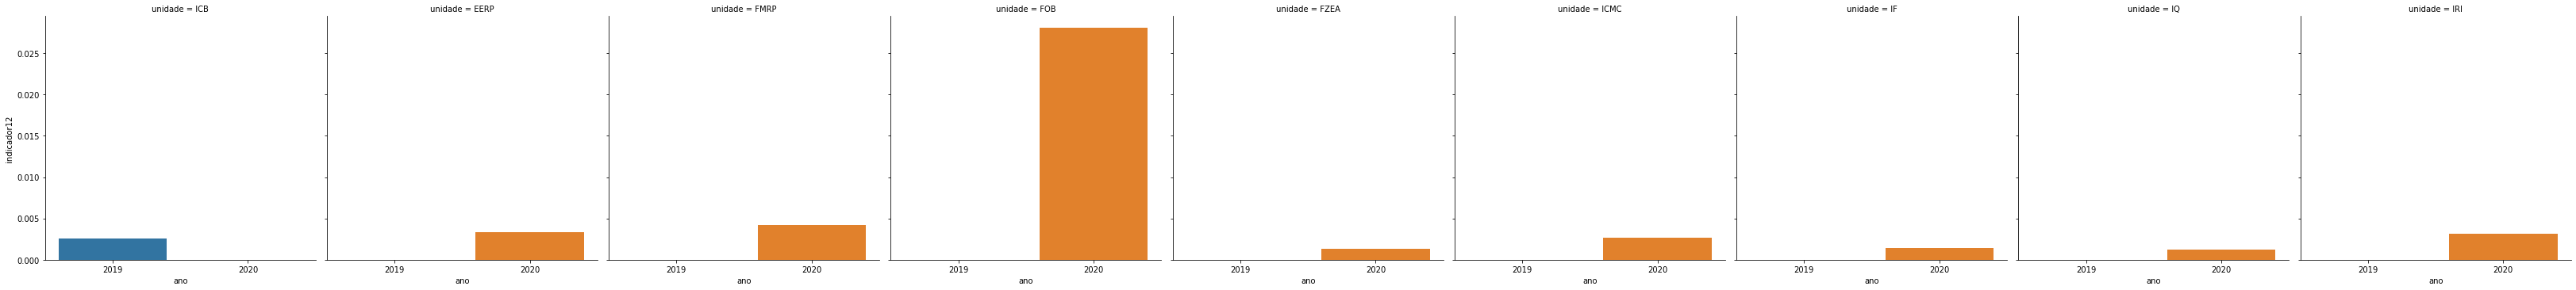

In [66]:
sns.catplot(x="ano", y="indicador12", col="unidade",
                data=i1_12, 
                kind="bar"
                )

#**Indicador 13: game / Nº de matriculas**

In [67]:
i1_13 = i1.loc[(i1['indicador13']) > 0.00001] 
i1_13.sample(2)

,unidade,ano,Nunique,N,Nresource1,Nresource2,Ncommunication,forum,lesson,questionnaire,quiz,resource,url,studentquiz,game,matr,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
455,FMRP,2020,3899.0,29385.0,20966.0,550.0,3076.0,2051.0,150.0,656.0,1764.0,13649.0,3082.0,6.0,8.0,1435.0,2.717073,20.477352,14.610453,0.383275,2.143554,1.429268,0.10453,0.457143,1.229268,9.511498,2.147735,0.004181,0.005575
453,FFLCH,2020,2769.0,30252.0,25080.0,567.0,2033.0,1810.0,41.0,225.0,382.0,18314.0,4713.0,0.0,1.0,9927.0,0.278936,3.047446,2.526443,0.057117,0.204795,0.182331,0.00413,0.022665,0.038481,1.844868,0.474766,0.000000,0.000101


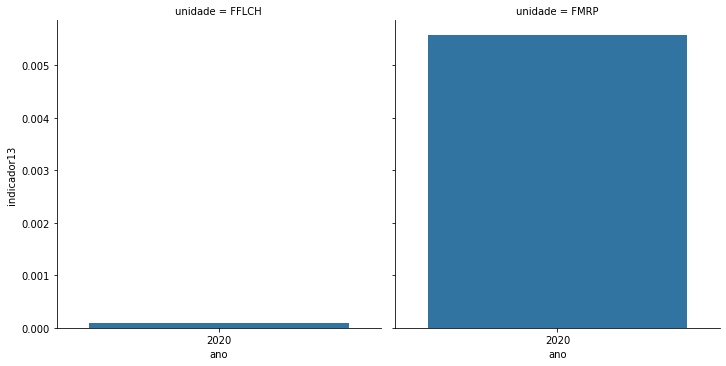

In [68]:
sns.catplot(x="ano", y="indicador13", col="unidade",
                data=i1_13, 
                kind="bar"
                )